In [2]:
# instalacion de openpyxl

import openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 as sql3
from matplotlib import rcParams

In [3]:
# Importacion de articles.db (sql) de la carpeta data y trannsformacion a dataframe
conn = sql3.connect('data/articles.db')

# se toma la columna article_id como index del dataframe
# y como el metodo read_sql_query no la elimina,
# hago un drop de la columna posterior, ya que todos NaN y no 
 # tiene opcion inplace.

sql_query = pd.read_sql_query("SELECT * FROM articles", conn, index_col='article_id')
df_articles = pd.DataFrame(sql_query, columns=['article_id', 'article_name','unit_price'])
df_articles = df_articles.drop(columns='article_id', axis=1)
# imprimo el dataframe
print(df_articles.head(2))

           article_name unit_price
article_id                        
20015        Smartphone     525.00
20016           Full Pc    2127.81


In [4]:
# importacio de sales.db (sql) de la carpeta data y transformacion a dataframe
df_sellers = pd.read_excel('data/sellers.xlsx', index_col='seller_id')
# imprimo el dataframe
print(df_sellers.head(4))


                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame


In [5]:
# importacion de orders.csv de la carpeta data y transformacion a dataframe
df_orders = pd.read_csv('data/orders.csv')
# imprimo el dataframe
print(df_orders.head(3))

   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia


In [6]:
# explorar y preparar datos
# exploracion del dataframe df_articles
print("Muestra de datos")
print(df_articles.sample())

Muestra de datos
           article_name unit_price
article_id                        
20026               SDD      22.00


In [7]:
print("Dimensiones del dataframe")
print(df_articles.shape)

Dimensiones del dataframe
(31, 2)


In [8]:
print("Busqueda de valores nulos")
print(df_articles.isnull().sum())

Busqueda de valores nulos
article_name    0
unit_price      0
dtype: int64


In [9]:
print("Tipo de datos por columna")
print(df_articles.dtypes)

Tipo de datos por columna
article_name    object
unit_price      object
dtype: object


In [10]:
# exploracion del dataframe df_sellers
print("Muestra de datos")
print(df_sellers.sample())

Muestra de datos
                seller_name
seller_id                  
1          Aveline Swanwick


In [11]:
print("Dimensiones del dataframe")
print(df_sellers.shape)

Dimensiones del dataframe
(15, 1)


In [12]:
print("Busqueda de valores nulos")
print(df_sellers.isnull().sum())

Busqueda de valores nulos
seller_name    0
dtype: int64


In [13]:
print("Tipo de datos por columna")
print(df_sellers.dtypes)

Tipo de datos por columna
seller_name    object
dtype: object


In [14]:
# exploracion del dataframe df_orders
print("Muestra de datos")
print(df_orders.sample())

Muestra de datos
     order_id  week  article_id  quantity  seller_id country_name
810     15834     3       20041         1          3       Brazil


In [15]:
print("Dimensiones del dataframe")
print(df_orders.shape)

Dimensiones del dataframe
(1000, 6)


In [16]:
print("Busqueda de valores nulos")
print(df_orders.isnull().sum())


Busqueda de valores nulos
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64


In [17]:
print("Tipo de datos por columna")
print(df_orders.dtypes)

Tipo de datos por columna
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


In [18]:
# cambiar el formato de la columna precios de los articulos
# de string a float
pd.options.display.float_format = '$ {:,.2f}'.format
df_articles['unit_price'] = df_articles['unit_price'].astype(float)
# imprimo el dataframe
print(df_articles.dtypes)

article_name     object
unit_price      float64
dtype: object


In [19]:
print(df_articles.head(3))

           article_name  unit_price
article_id                         
20015        Smartphone    $ 525.00
20016           Full Pc  $ 2,127.81
20017           Monitor    $ 230.00


<h2>Analisis de datos</h2>
<h3>Definir el modelo de datos</h3>
<img src="img/Diagrama.png" alt="Modelo de datos" style="width: 600px;"/>

In [20]:
data = df_orders.copy()
data.head(2)

,order_id,week,article_id,quantity,seller_id,country_name
0,15024,1,20039,10,10,Peru
1,15025,1,20029,15,5,Peru


In [21]:
# Voy a unir los distintos DataFrame utilizando el método merge (equivalente en Pandas a JOIN en SQL) uniendo de la siguiente manera:
# article_id del DataFrame Data con el index de df_articles para obtener el nombre y precio unitario
# seller_id del DataFrame Data con el index de df_sellers para obtener el nombre del vendedor
# Posteriormente tengo dropear las columnas article_id y seller_id del DataFrame data ya que no tiene sentido que sigan ahí.

data_article = data.merge(df_articles, left_on='article_id', right_on=df_articles.index, how='inner')
data_article.head(3)

,order_id,week,article_id,quantity,seller_id,country_name,article_name,unit_price
0,15024,1,20039,10,10,Peru,Water Cooling,$ 67.50
1,15047,1,20039,5,9,Argentina,Water Cooling,$ 67.50
2,15058,1,20039,9,12,Mexico,Water Cooling,$ 67.50


In [22]:
data_article_seller = data_article.merge(df_sellers, left_on='seller_id', right_on=df_sellers.index, how='inner')
data_article_seller.head(3)

,order_id,week,article_id,quantity,seller_id,country_name,article_name,unit_price,seller_name
0,15024,1,20039,10,10,Peru,Water Cooling,$ 67.50,Cirilo Grandham
1,15892,3,20039,15,10,Brazil,Water Cooling,$ 67.50,Cirilo Grandham
2,15732,3,20029,6,10,Guatemala,Mouse,$ 30.30,Cirilo Grandham


In [23]:
data_unificada = data_article_seller.drop(columns=['article_id', 'seller_id'], axis=1)
data_unificada.head(3)

,order_id,week,quantity,country_name,article_name,unit_price,seller_name
0,15024,1,10,Peru,Water Cooling,$ 67.50,Cirilo Grandham
1,15892,3,15,Brazil,Water Cooling,$ 67.50,Cirilo Grandham
2,15732,3,6,Guatemala,Mouse,$ 30.30,Cirilo Grandham


In [24]:
# crear nueva columna con el total de la venta y eliminar las columnas unit_price
data_unificada['total_amount'] = data_unificada['unit_price'] * data_unificada['quantity']
data_unificada.head(3)

,order_id,week,quantity,country_name,article_name,unit_price,seller_name,total_amount
0,15024,1,10,Peru,Water Cooling,$ 67.50,Cirilo Grandham,$ 675.00
1,15892,3,15,Brazil,Water Cooling,$ 67.50,Cirilo Grandham,"$ 1,012.50"
2,15732,3,6,Guatemala,Mouse,$ 30.30,Cirilo Grandham,$ 181.80


In [25]:
data_a_trabajar = data_unificada.drop(['unit_price', 'order_id'], axis=1)
data_a_trabajar.head(3)

,week,quantity,country_name,article_name,seller_name,total_amount
0,1,10,Peru,Water Cooling,Cirilo Grandham,$ 675.00
1,3,15,Brazil,Water Cooling,Cirilo Grandham,"$ 1,012.50"
2,3,6,Guatemala,Mouse,Cirilo Grandham,$ 181.80


In [26]:
data_a_trabajar.dtypes

week              int64
quantity          int64
country_name     object
article_name     object
seller_name      object
total_amount    float64
dtype: object

In [27]:
# Resolucion analitica
# Cual es el artículo más vendido?  ( en unidades)
group_vendidos = data_a_trabajar.groupby('article_name').sum().sort_values('quantity', ascending=False)
mas_vendido = group_vendidos.loc[:, 'quantity'].head(1).index[0]
mas_vendido_cantidad = group_vendidos.loc[:, 'quantity'].head(1).values[0]
print(f"El artículo más vendido es {mas_vendido} con {mas_vendido_cantidad} unidades vendidas")


El artículo más vendido es HDD con 413 unidades vendidas


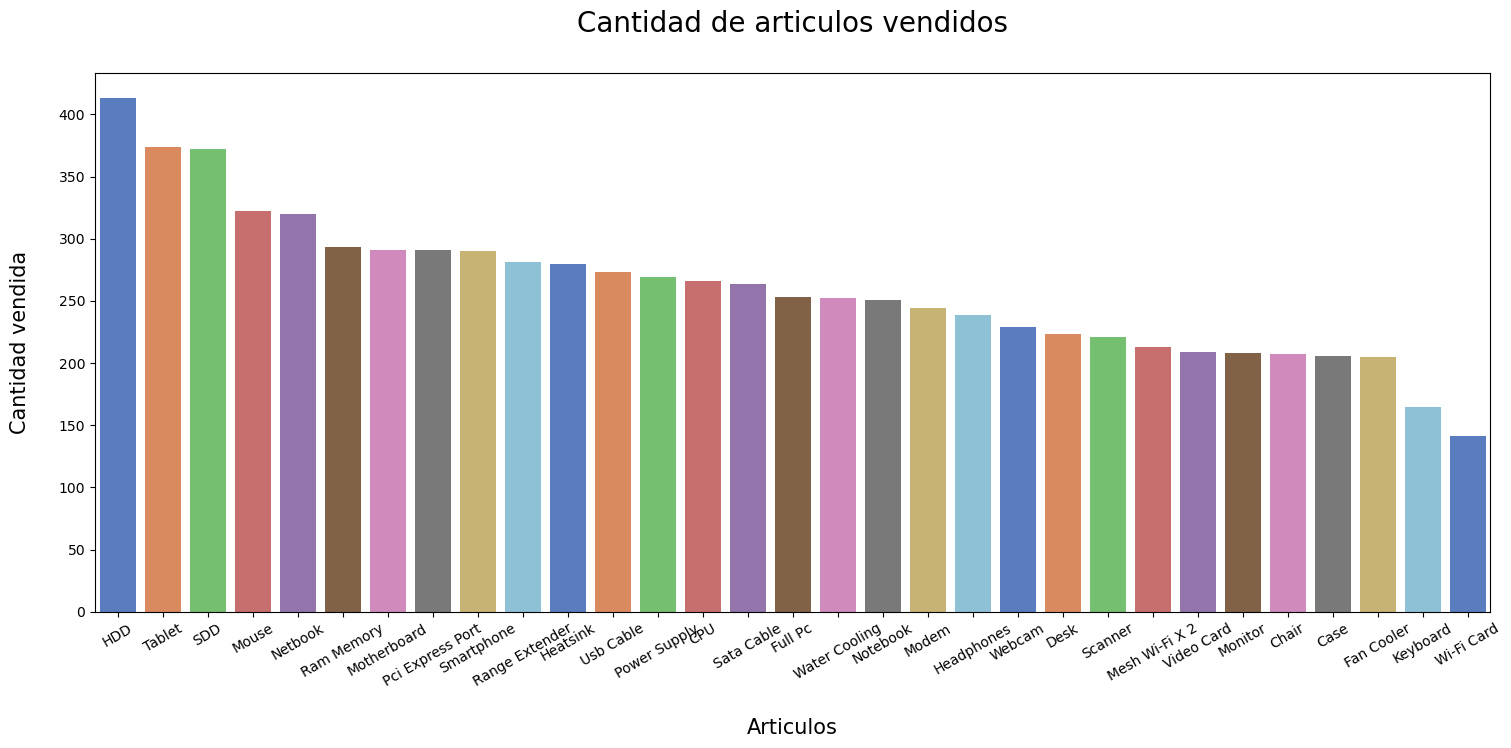

In [28]:
# Resolucion grafica
# ver todos los articulos venndidos y sus cantidades,ordenando el dataframe de mayor a menor
rcParams['figure.figsize'] = 18, 7
ax = sns.barplot(data=group_vendidos, x=group_vendidos.index,y='quantity', palette='muted')
ax.set_xlabel('\nArticulos', fontsize=15)
ax.set_ylabel('Cantidad vendida\n', fontsize=15)
plt.xticks(rotation=30)
plt.title('Cantidad de articulos vendidos\n', fontsize=20)
ax.tick_params(axis='both', labelsize=10)
plt.show()

In [29]:
# que articulo genero mayor ingreso?
group_ingresos = data_a_trabajar.groupby('article_name').sum().sort_values('total_amount', ascending=False)
mas_ingresos = group_ingresos.loc[:, 'total_amount'].head(1).index[0]
mas_ingresos_cantidad = round(group_ingresos.loc[:, 'total_amount'].head(1).values[0],2)
print(f"El artículo que generó mayor ingreso es {mas_ingresos} con un total de ${mas_ingresos_cantidad}")

El artículo que generó mayor ingreso es Full Pc con un total de $538335.93


In [30]:
# Resolucion grafica
# se van a tomar los 4 articulos que generaron mayor ingreso y el resto se agruparan en otros
cat_prinncipales = group_ingresos[group_ingresos['total_amount'] > 50000]['total_amount']
cat_menores = group_ingresos[group_ingresos['total_amount'] < 50000]['total_amount'].sum()
cat_menores = pd.Series(cat_menores, index=['Otros'])
amount_plot = pd.concat([cat_prinncipales, cat_menores])
print("Cuatro articulos que generaron mayor ingreso y el resto se agruparan en otros")
amount_plot

Cuatro articulos que generaron mayor ingreso y el resto se agruparan en otros


Full Pc      $ 538,335.93
Notebook     $ 251,000.00
Smartphone   $ 152,250.00
Chair         $ 69,477.48
Otros        $ 464,744.43
dtype: float64

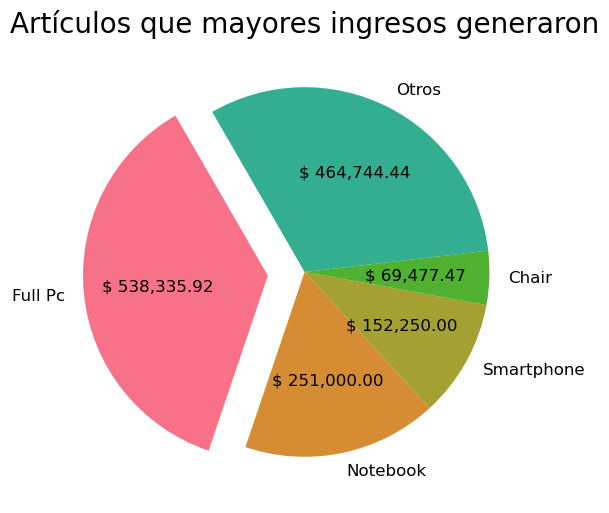

In [49]:
rcParams['figure.figsize'] = 6, 6
explode = (0.2,0,0,0,0)
total = amount_plot.sum()
plt.title('Artículos que mayores ingresos generaron', fontsize=20)
plt.pie(x=amount_plot, labels=amount_plot.index, colors=sns.color_palette("husl", 9), explode=explode, startangle=120, textprops={'fontsize': 12}, autopct = lambda p: '$ {:,.2f}'.format(p * total / 100))
plt.show()


In [32]:
# a que vendedor debe otorgarse un bono por "mejor vendedor del mes"?
# resolucion analitica
group_vendedores = data_a_trabajar.groupby('seller_name').sum().sort_values('total_amount', ascending=False)
mejor_vendedor = group_vendedores.head(1).index[0]
mejor_vendedor_cantidad = round(group_vendedores.head(1)['total_amount'].values[0],2)
print(f"El mejor vendedor del mes es {mejor_vendedor} con un total de ${mejor_vendedor_cantidad}")

El mejor vendedor del mes es Janel O'Curran con un total de $192832.47


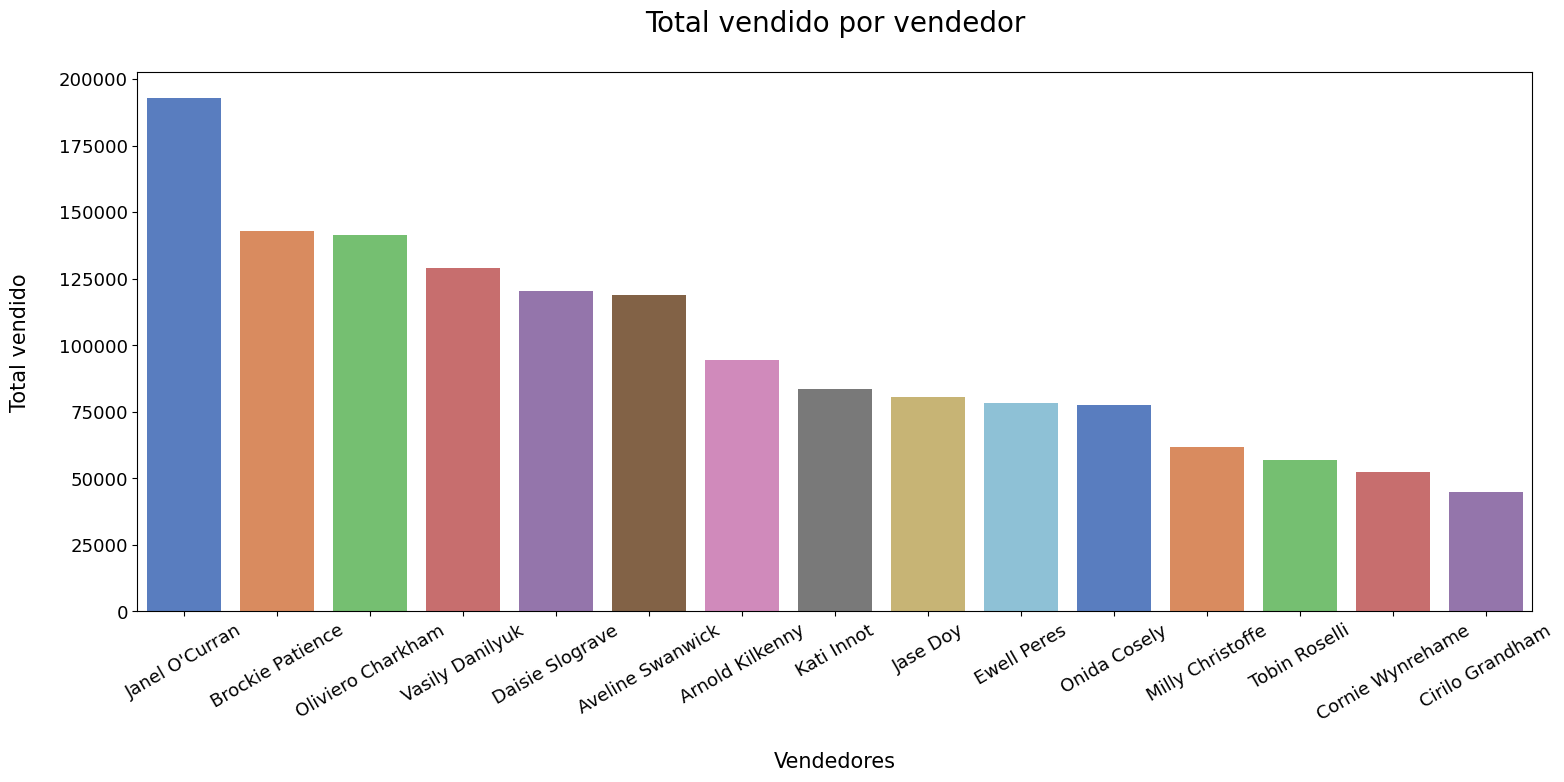

In [33]:
# resolucion grafica
rcParams['figure.figsize'] = 18, 7
ax = sns.barplot(data=group_vendedores, x=group_vendedores.index,y='total_amount', palette='muted')
ax.set_xlabel('\nVendedores', fontsize=15)
ax.set_ylabel('Total vendido\n', fontsize=15)
plt.xticks(rotation=30)
plt.title('Total vendido por vendedor\n', fontsize=20)
ax.tick_params(axis='both', labelsize=13)
plt.show()

In [34]:
# hay grandes varaiciones en ventas a lo largo del mes?
# agrupar el dataframe por la columna week y luego se ordena por total_amount
group_variaciones = data_a_trabajar.groupby('week').sum().sort_values('total_amount', ascending=False)
print(group_variaciones['total_amount'])

week
1   $ 507,458.81
2   $ 415,364.44
3   $ 329,140.03
4   $ 223,844.56
Name: total_amount, dtype: float64


In [35]:
# maximo mensual
maximo_mensual = group_variaciones['total_amount'].max()
# cambiar la configuracion de los floats para que los muestre con %
pd.options.display.float_format = '%{:,.2f}'.format
(group_variaciones['total_amount'] / maximo_mensual) - 1

week
1    %0.00
2   %-0.18
3   %-0.35
4   %-0.56
Name: total_amount, dtype: float64

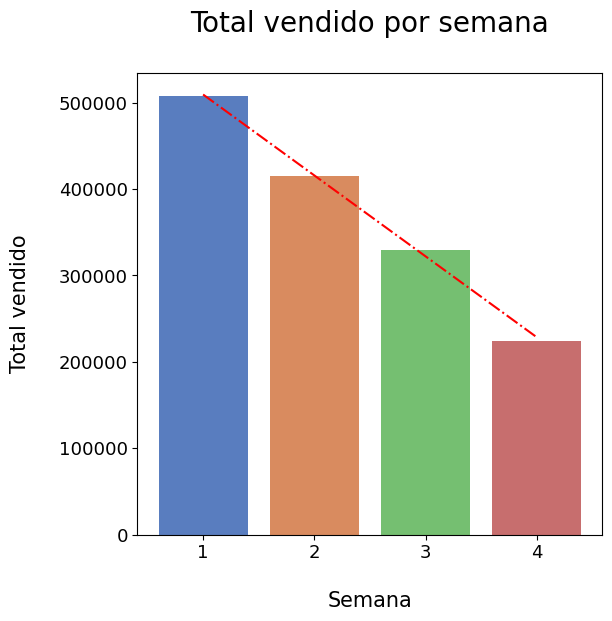

In [52]:
# resolucion grafica
rcParams['figure.figsize'] = 6, 6
ax = sns.barplot(data=group_variaciones, x=group_variaciones.index,y='total_amount', palette='muted')
ax.set_xlabel('\nSemana', fontsize=15)
ax.set_ylabel('Total vendido\n', fontsize=15)
plt.xticks(rotation=0)
plt.title('Total vendido por semana\n', fontsize=20)
ax.tick_params(axis='both', labelsize=13)
x =np.arange(len(group_variaciones.index))
y_tendencia = np.poly1d(np.polyfit(x, group_variaciones['total_amount'], 1))(x)
ax2 = plt.plot(x, y_tendencia, color='red', label='tendencia', linestyle='dashdot')
plt.show()


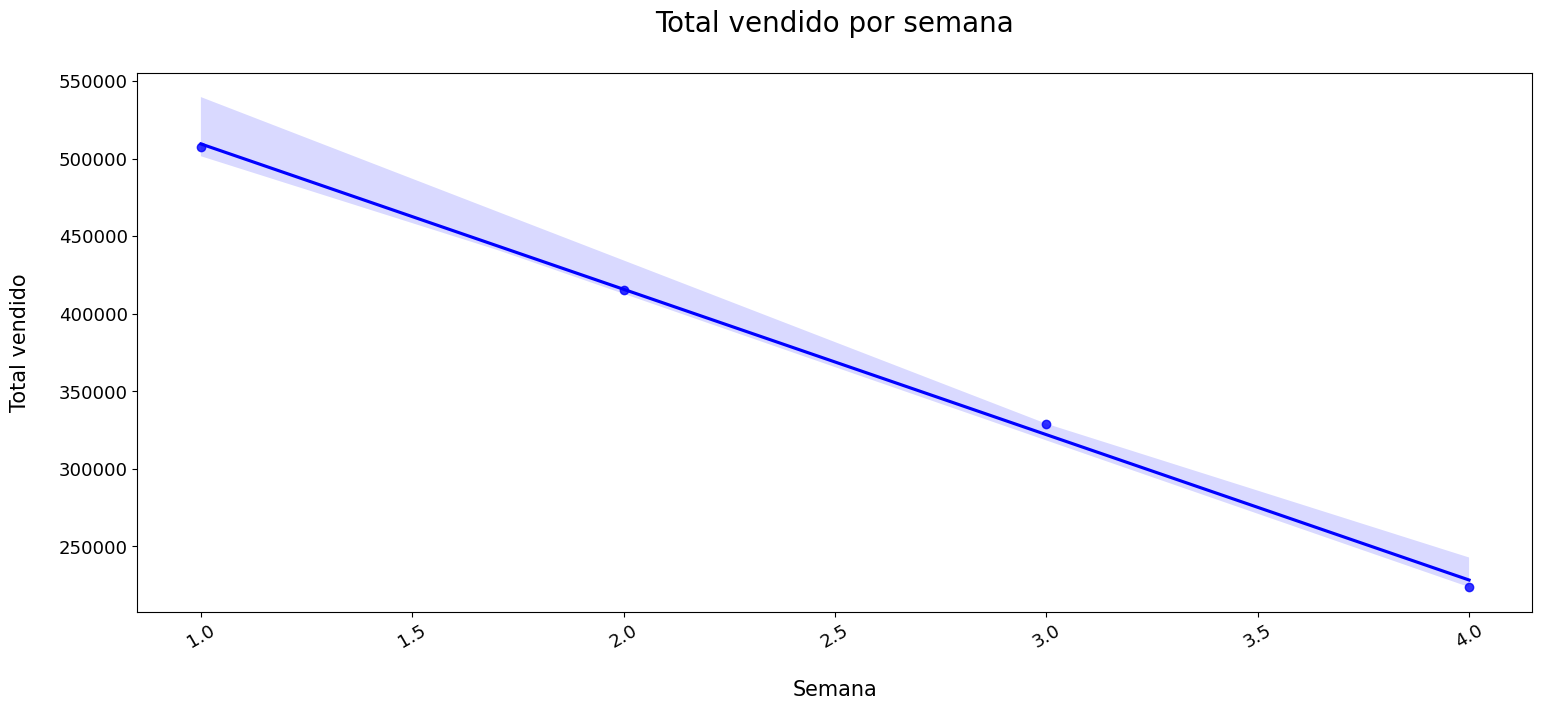

In [37]:
# agregar una linea de tendencia al grafico anterior
rcParams['figure.figsize'] = 18, 7
ax = sns.regplot(data=group_variaciones, x=group_variaciones.index,y='total_amount', color='blue')
ax.set_xlabel('\nSemana', fontsize=15)
ax.set_ylabel('Total vendido\n', fontsize=15)
plt.xticks(rotation=30)
plt.title('Total vendido por semana\n', fontsize=20)
ax.tick_params(axis='both', labelsize=13)
plt.show()



<h2>¿Cuántas ventas se realizaron en cada país?</h2>
<h2>¿Cuál es el país con el mayor número de ventas?</h2>
<h2>¿Cuál es el país con el menor número de ventas?</h2>

In [38]:
# resolucion analitica
# ¿Cuántas ventas se realizaron en cada país?
group_paises = data_a_trabajar.groupby('country_name').sum().sort_values('total_amount', ascending=False)
print(group_paises[['quantity','total_amount']])

              quantity  total_amount
country_name                        
Brazil            2515   %441,271.85
Argentina          947   %205,832.78
Colombia           881   %177,514.29
Peru              1027   %161,421.12
Mexico             846   %138,619.99
Venezuela          320    %77,684.52
El Salvador        111    %57,391.26
Guatemala          202    %52,579.25
Honduras           303    %36,763.56
Costa Rica         145    %34,606.50
Chile              231    %24,660.98
Bolivia            181    %22,682.80
Uruguay             92    %17,843.09
Ecuador            129    %17,475.30
Paraguay           123     %8,195.12
Puerto Rico         12     %1,265.43


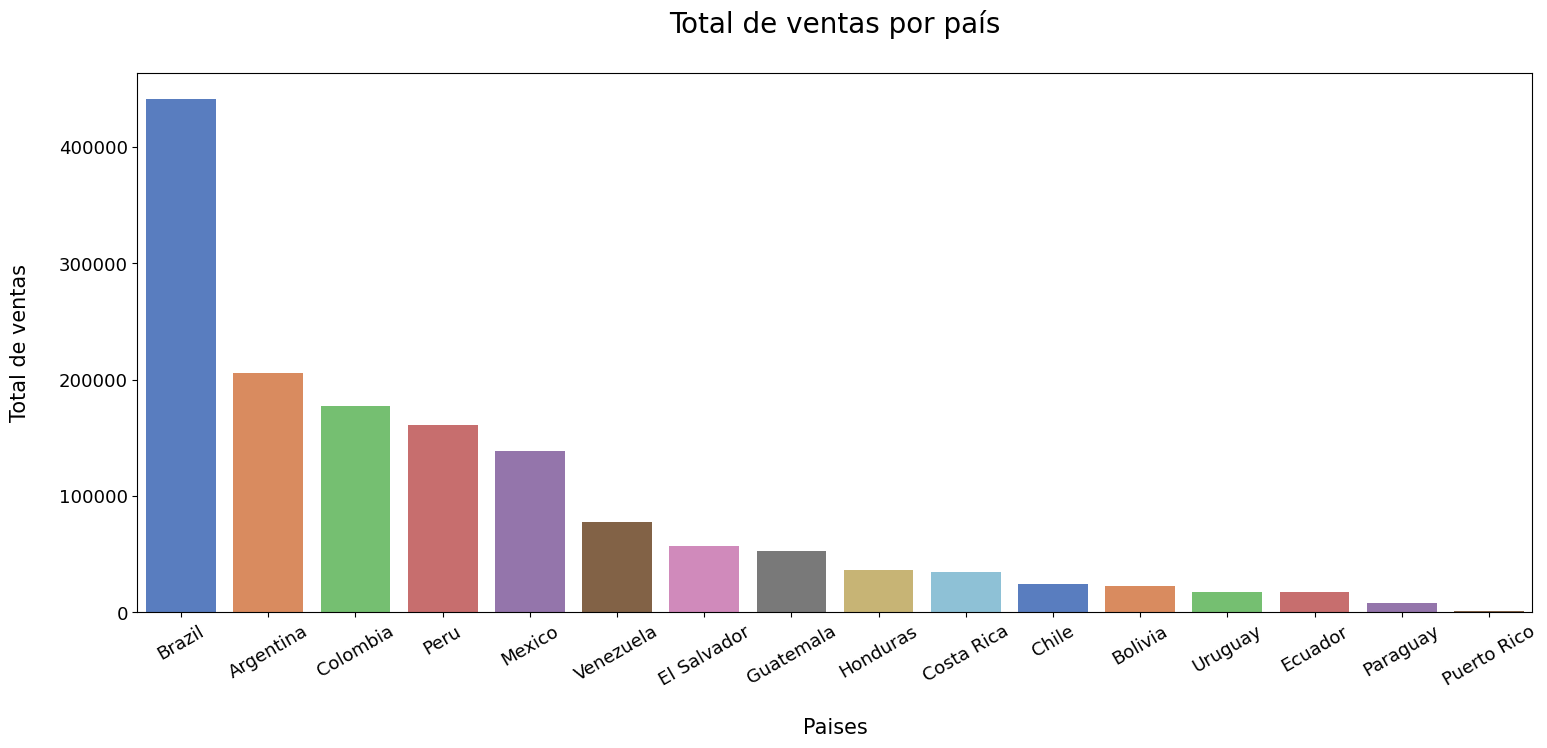

In [39]:
# resolucion grafica
rcParams['figure.figsize'] = 18, 7
ax = sns.barplot(data=group_paises, x=group_paises.index,y='total_amount', palette='muted')
ax.set_xlabel('\nPaises', fontsize=15)
ax.set_ylabel('Total de ventas\n', fontsize=15)
plt.xticks(rotation=30)
plt.title('Total de ventas por país\n', fontsize=20)
ax.tick_params(axis='both', labelsize=13)
plt.show()

In [40]:
# ¿Cuál es el país que más ventas realizó?
# resolucion analitica
group_pais_mas_ventas = data_a_trabajar.groupby('country_name').sum().sort_values('total_amount', ascending=False)
pais_mas_ventas = group_pais_mas_ventas.head(1).index[0]
ventas_pais_mas_ventas = group_pais_mas_ventas.head(1)['total_amount'].values[0]
print(f"El país que más ventas realizó es {pais_mas_ventas} con un total de {ventas_pais_mas_ventas} ventas")


El país que más ventas realizó es Brazil con un total de 441271.85 ventas


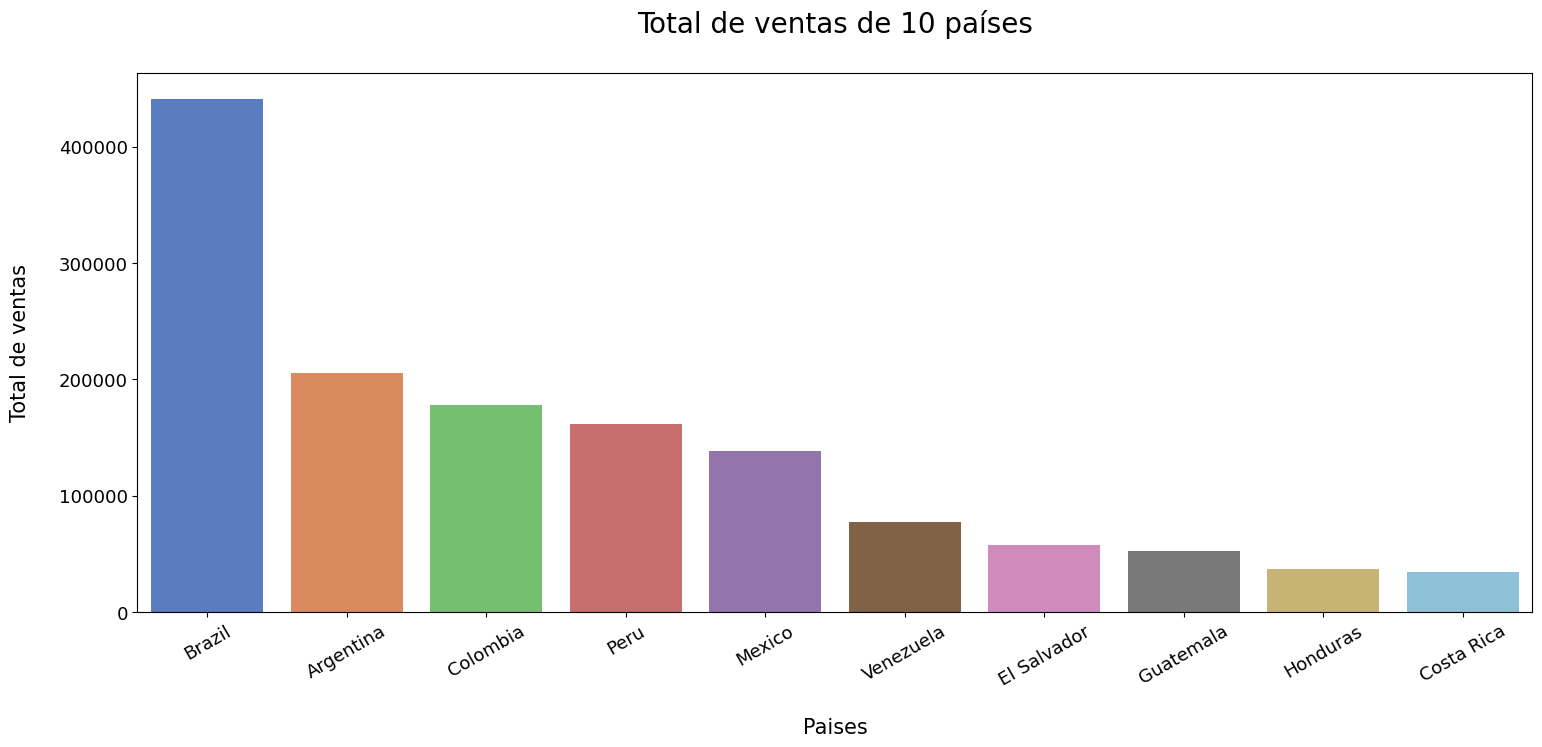

In [41]:
# resolucion grafica
# los 10 paises que mas ventas realizaron
rcParams['figure.figsize'] = 18, 7
ax = sns.barplot(data=group_pais_mas_ventas.head(10), x=group_pais_mas_ventas.head(10).index,y='total_amount', palette='muted')
ax.set_xlabel('\nPaises', fontsize=15)
ax.set_ylabel('Total de ventas\n', fontsize=15)
plt.xticks(rotation=30)
plt.title('Total de ventas de 10 países\n', fontsize=20)
ax.tick_params(axis='both', labelsize=13)
plt.show()

In [42]:
# ¿Cuál es el país que menos ventas realizó?
# resolucion analitica
group_pais_menos_ventas = data_a_trabajar.groupby('country_name').sum().sort_values('total_amount', ascending=False)
pais_menos_ventas = group_pais_menos_ventas.tail(1).index[0]
ventas_pais_menos_ventas = group_pais_menos_ventas.tail(1)['total_amount'].values[0]
print(f"El país que menos ventas realizó es {pais_menos_ventas} con un total de {ventas_pais_menos_ventas} ventas")

El país que menos ventas realizó es Puerto Rico con un total de 1265.4299999999998 ventas


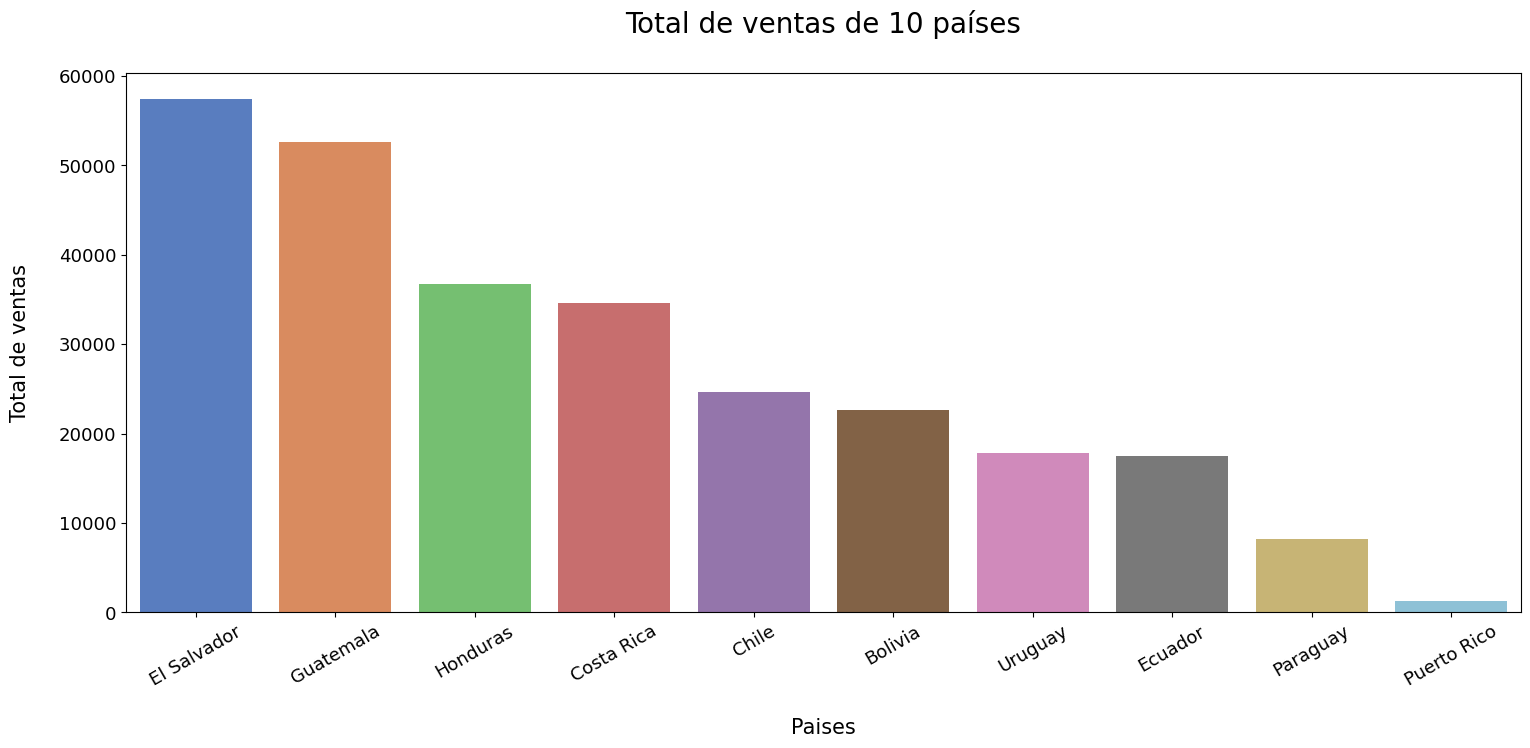

In [43]:
# resolucion grafica
# los 10 paises que menos ventas realizaron
rcParams['figure.figsize'] = 18, 7
ax = sns.barplot(data=group_pais_menos_ventas.tail(10), x=group_pais_menos_ventas.tail(10).index,y='total_amount', palette='muted')
ax.set_xlabel('\nPaises', fontsize=15)
ax.set_ylabel('Total de ventas\n', fontsize=15)
plt.xticks(rotation=30)
plt.title('Total de ventas de 10 países\n', fontsize=20)
ax.tick_params(axis='both', labelsize=13)
plt.show()